In [1]:
from datascience import *
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

## Planes

0-10 mins

In [31]:
# N = The number of z's in Shakespeare's 37 plays.
sample_size = 30
population = Table().with_column('Serial number', np.arange(N)+1)
observation = population.sample(sample_size).column(0)

In [32]:
observation

array([765, 553, 121, 844, 965, 646, 146, 634, 685, 416, 106, 910,  31,
       127, 172, 379, 471, 325, 635, 186, 385, 488, 585,  68, 619, 137,
       120, 842, 101, 414])

In [33]:
np.average(observation)

429.19999999999999

In [34]:
max(observation)

965

### What is N?¿?¿?¿?¿?

In [4]:
maxes = make_array()   # max(observations)
doubles = make_array() # 2 * np.average(observations)

for i in np.arange(1000):
    observation = population.sample(sample_size).column(0)
    maxes = np.append(maxes, max(observation))
    doubles = np.append(doubles, 2 * np.average(observation))

estimates = Table().with_columns(
    'Max', maxes,
    '2 * average', doubles
)

estimates

Max,2 * average
945,929.8
1020,1062.13
893,776.6
998,864.6
991,1043.53
947,829.867
1017,990.867
1015,1046.33
990,1178.53
1020,1012.27


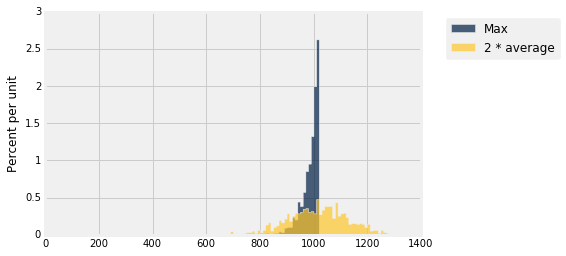

In [5]:
every_ten = np.arange(1, N+300, 10)
estimates.hist(bins=every_ten)

## A clever estimator

10-15 mins

In [37]:
def clever(observation):
    return observation.max() + observation.min()

In [40]:
maxes = make_array()    # max(observations)
doubles = make_array()  # 2 * np.average(observations)
max_plus = make_array() # clever(observation)

for i in np.arange(1000):
    observation = population.sample(sample_size).column(0)
    maxes = np.append(maxes, max(observation))
    doubles = np.append(doubles, 2 * np.average(observation))
    max_plus = np.append(max_plus, clever(observation))

estimates = Table().with_columns(
    'Max', maxes,
    '2 * average', doubles,
    'Max + min', max_plus
)

estimates

Max,2 * average,Max + min
927,904.267,928
1012,1133.73,1014
1006,872.667,1013
933,1020.93,990
1006,1097.8,1020
964,972.667,976
960,828.533,968
921,997.267,967
981,1151.2,1028
1019,1109.67,1114


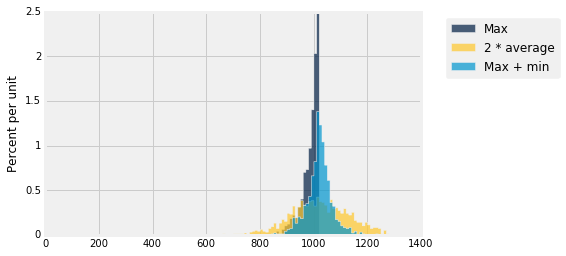

In [44]:
estimates.hist(bins=every_ten)

In [43]:
# Bias

for label in estimates.labels:
    print('Average difference for', label, ':', (N-estimates.column(label)).mean())

Average difference for Max : 33.208
Average difference for 2 * average : -4.47753333333
Average difference for Max + min : -0.199


## Bias & Variability

15-20 mins

In [42]:
# Variability

for label in estimates.labels:
    print('Average absolute difference for', label, ':', np.abs(N-estimates.column(label)).mean())

Average absolute difference for Max : 33.208
Average absolute difference for 2 * average : 86.6414
Average absolute difference for Max + min : 33.299


## Swain v Alabama

20-50 mins

What is the probability of getting the actual panel with 8/100 blacks?

1. Start with the distributions of eligible jurors and the actual panel.
2. Draw panels at random from the eligible jurors.
3. See if my actual panel is likely.

In [11]:
swain = Table().with_columns(
    'Ethnicity', make_array('Black', 'Other'),
    'Eligible', make_array(0.26, 0.74),
    'Panel', make_array(0.08, 0.92)
)

swain.set_format([1, 2], PercentFormatter(0))

Ethnicity,Eligible,Panel
Black,26%,8%
Other,74%,92%


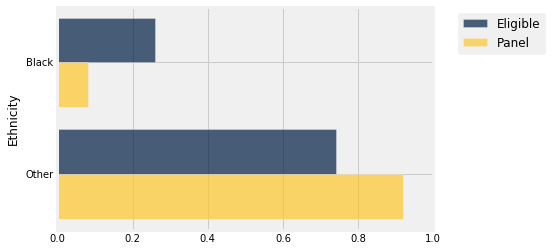

In [12]:
swain.barh(0)

### Total Variation Distance (TVD)

In [13]:
diff = swain.with_column('Difference', swain.column(1) - swain.column(2))
diff

Ethnicity,Eligible,Panel,Difference
Black,26%,8%,0.18
Other,74%,92%,-0.18


In [46]:
abs_diff = diff.with_column('Abs. Difference', np.abs(diff.column(3)))
abs_diff

Ethnicity,Eligible,Panel,Difference,Abs. Difference
Black,26%,8%,0.18,0.18
Other,74%,92%,-0.18,0.18


In [47]:
sum(abs_diff.column(4)) / 2

0.18000000000000002

In [48]:
def total_variation_distance(distribution_1, distribution_2):
    """Each distribution is an array of proportions that sums to 1."""
    return np.abs(distribution_1 - distribution_2).sum()/2

In [49]:
def table_tvd(table, label_1, label_2):
    return total_variation_distance(table.column(label_1), table.column(label_2))

table_tvd(swain, 'Eligible', 'Panel')

0.18000000000000002

### Simulating the statistics

In [50]:
swain.sample(10)

Ethnicity,Eligible,Panel
Black,26%,8%
Other,74%,92%
Black,26%,8%
Black,26%,8%
Black,26%,8%
Black,26%,8%
Other,74%,92%
Other,74%,92%
Other,74%,92%
Black,26%,8%


In [51]:
ethnicity = swain.select(0)
ethnicity

Ethnicity
Black
Other


In [52]:
ethnicity.sample(10)

Ethnicity
Black
Other
Black
Other
Other
Black
Other
Other
Other
Other


In [53]:
population_distribution = swain.column('Eligible')
population_distribution

array([ 0.26,  0.74])

In [54]:
ethnicity.sample(10, weights=population_distribution)

Ethnicity
Black
Other
Other
Black
Other
Black
Other
Other
Black
Black


In [55]:
panel_size = 100
swain.select(0).sample(panel_size, weights=swain.column('Eligible'))

Ethnicity
Black
Other
Other
Black
Other
Other
Other
Black
Other
Other


In [64]:
panel = swain.select(0).sample(panel_size, weights=swain.column('Eligible'))
counts = panel.group(0)
sample_proportions = counts.select(0).with_column('Random', counts.column(1) / 100)
sample_proportions.set_format(1, PercentFormatter(0))

Ethnicity,Random
Black,25%
Other,75%


In [65]:
swain.join('Ethnicity', sample_proportions)

Ethnicity,Eligible,Panel,Random
Black,26%,8%,25%
Other,74%,92%,75%


In [66]:
def random_jury_panel():
    panel = swain.select(0).sample(panel_size, weights=swain.column('Eligible'))
    counts = panel.group(0)
    sample_proportions = counts.select(0).with_column('Random', counts.column(1) / panel_size)
    sample_proportions.set_format(1, PercentFormatter(0))
    return swain.join('Ethnicity', sample_proportions)

random_jury_panel()

Ethnicity,Eligible,Panel,Random
Black,26%,8%,20%
Other,74%,92%,80%


### Repeated trials

In [67]:
# Compute the empirical distribution of TVDs

tvds = make_array()

for i in np.arange(1000): # Repetitions
    new_sample = random_jury_panel()
    tvds = np.append(tvds, table_tvd(new_sample, 'Eligible', 'Random'))

results = Table().with_column('TVD between the population & a random sample', tvds)
results

TVD between the population & a random sample
0.06
0.03
0.04
0.1
0.01
0.03
0.06
0.02
0.03
0.07


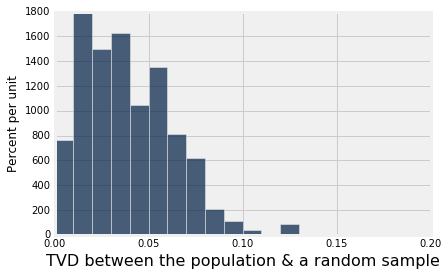

In [68]:
results.hist(bins=np.arange(0, 0.2, 0.01))